In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
%matplotlib notebook

## Define unit cells

In [3]:
thetas = np.array([0,1,2,3,4])/5*2*np.pi
e = np.array([[np.cos(x),np.sin(x)] for x in thetas])
l_c = 5.22
l_a = 4.54
phi = (1+np.sqrt(5))/2

<IPython.core.display.Javascript object>


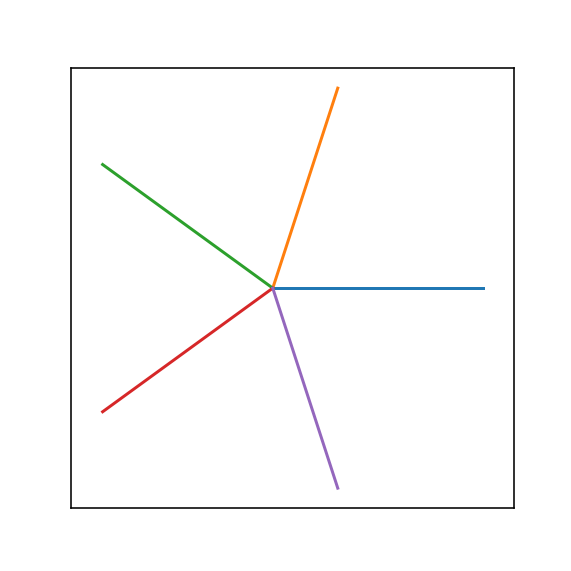

In [4]:
fig,ax = plt.subplots(1,1, figsize=[4, 4])
ax.axis('equal')

for i in range(len(thetas)):
    ax.plot([0,e[i,0]],[0,e[i,1]])

ax.set_xticks([])
ax.set_yticks([])
plt.show()

### Equilateral hexagon unit cell (H)

In [5]:
index_edges = [0,1,3]
edges_H = e[index_edges]

# place atoms
# red sites
cH_red = []
for i_z in range(3):
    f_edge_r = np.array([[0,0,0],[1,0,0],[0,1,0],[1,0,-1],[0,1,-1],[1,1,-1]])
    c_xy = np.array([edges_H.T@f for f in f_edge_r])*l_a
    c_z = np.ones([len(f_edge_r),1])*i_z*l_c/2
    c = np.hstack((c_xy,c_z))
    cH_red.append(c)
cH_red = np.array(cH_red)
cH_red = cH_red.reshape([3*len(f_edge_r),3])

# blue sites
# layer 0
f_edge_b0 = np.array([[0,0,-1/phi],[1,1/phi,0],[1/phi,1,0],[1,1,-1+1/phi]])
c_xy = np.array([edges_H.T@f for f in f_edge_b0])*l_a
c_z = np.ones([len(f_edge_b0),1])*l_c/4
c_b0 = np.hstack((c_xy,c_z))
# layer 1
f_edge_b1 = np.array([[1,1,0],[0,0,-1]])
c_xy = np.array([edges_H.T@f for f in f_edge_b1])*l_a
c_z = np.ones([len(f_edge_b1),1])*l_c/4*3
c_b1 = np.hstack((c_xy,c_z))
cH_blu = np.vstack((c_b0,c_b1))

# yellow sites
# layer 0
f_edge_y0 = np.array([[0.5,0,0],[0,0.5,0],[1,0,-0.5],[0,1,-0.5],[0.5,1,-1],[1,0.5,-1]])
c_xy = np.array([edges_H.T@f for f in f_edge_y0])*l_a
c_z = np.ones([len(f_edge_y0),1])*l_c/4*3
cH_ylw = np.hstack((c_xy,c_z))

<IPython.core.display.Javascript object>


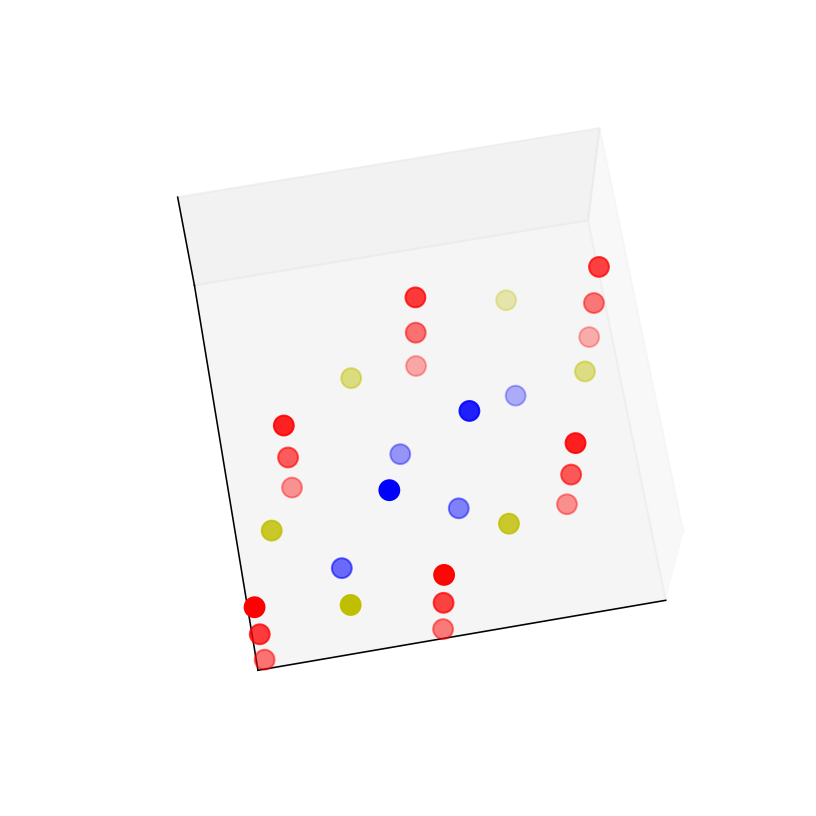

In [6]:
fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([10,10,6])
ax.view_init(elev=72, azim=-100)
# ax.view_init(elev=58.2825, azim=-90)
# ax.axis('equal')

ax.scatter(cH_red[:,0],cH_red[:,1],cH_red[:,2],
           marker='o',c='r',s=100)
ax.scatter(cH_blu[:,0],cH_blu[:,1],cH_blu[:,2],
           marker='o',c='b',s=100)
ax.scatter(cH_ylw[:,0],cH_ylw[:,1],cH_ylw[:,2],
           marker='o',c='y',s=100)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,6)
plt.show()

### Rhombus unit cell (R)

In [7]:
index_edges = [0,1]
edges_R = e[index_edges]

# place atoms
# red sites
cR_red = []
for i_z in range(3):
    f_edge_r = np.array([[0,0],[1,0],[0,1],[1,1]])
    c_xy = np.array([edges_R.T@f for f in f_edge_r])*l_a
    c_z = np.ones([len(f_edge_r),1])*i_z*l_c/2
    c = np.hstack((c_xy,c_z))
    cR_red.append(c)
cR_red = np.array(cR_red)
cR_red = cR_red.reshape([3*len(f_edge_r),3])

# blue sites
# layer 0
f_edge_b0 = np.array([[1/phi,1/phi]])
c_xy = np.array([edges_R.T@f for f in f_edge_b0])*l_a
c_z = np.ones([len(f_edge_b0),1])*l_c/4
c_b0 = np.hstack((c_xy,c_z))
# layer 1
f_edge_b1 = np.array([[1-1/phi,1-1/phi]])
c_xy = np.array([edges_R.T@f for f in f_edge_b1])*l_a
c_z = np.ones([len(f_edge_b1),1])*l_c/4*3
c_b1 = np.hstack((c_xy,c_z))
cR_blu = np.vstack((c_b0,c_b1))

# yellow sites
# layer 0
f_edge_y0 = np.array([[0,0.5],[0.5,0]])
c_xy = np.array([edges_R.T@f for f in f_edge_y0])*l_a
c_z = np.ones([len(f_edge_y0),1])*l_c/4
c_y0 = np.hstack((c_xy,c_z))
# layer 1
f_edge_y1 = np.array([[1,0.5],[0.5,1]])
c_xy = np.array([edges_R.T@f for f in f_edge_y1])*l_a
c_z = np.ones([len(f_edge_y1),1])*l_c/4*3
c_y1 = np.hstack((c_xy,c_z))
cR_ylw = np.vstack((c_y0,c_y1))

<IPython.core.display.Javascript object>


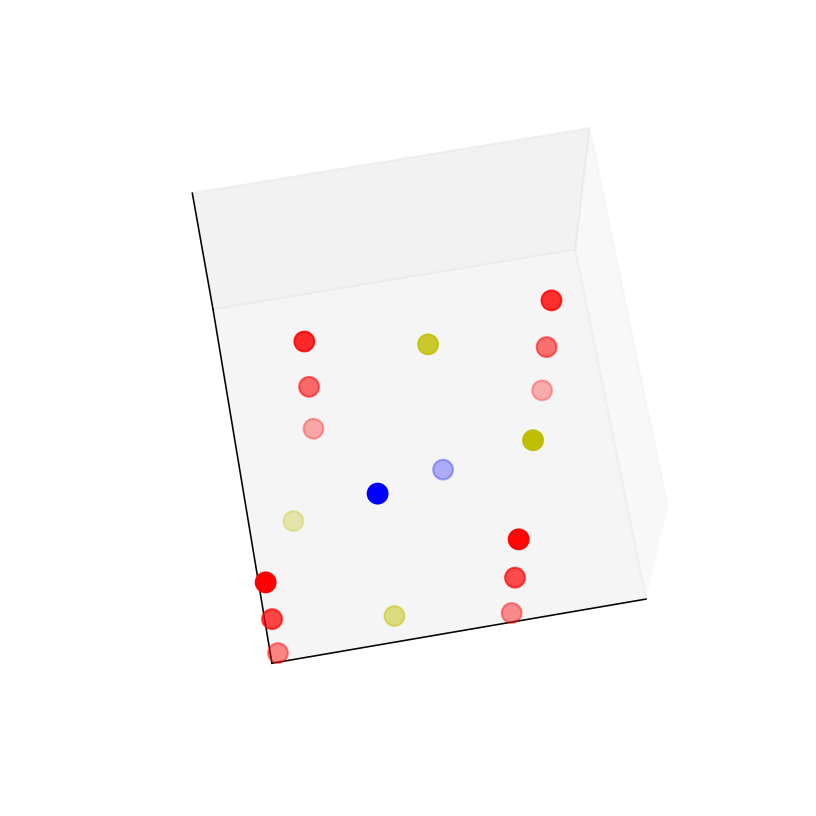

In [8]:
fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([7,7,6])
ax.view_init(elev=72, azim=-100)
# ax.view_init(elev=58.2825, azim=-90)
# ax.axis('equal')

ax.scatter(cR_red[:,0],cR_red[:,1],cR_red[:,2],
           marker='o',c='r',s=100)
ax.scatter(cR_blu[:,0],cR_blu[:,1],cR_blu[:,2],
           marker='o',c='b',s=100)
ax.scatter(cR_ylw[:,0],cR_ylw[:,1],cR_ylw[:,2],
           marker='o',c='y',s=100)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(0,7)
ax.set_ylim(0,7)
ax.set_zlim(0,6)
plt.show()

## Create LAMMPS dump file

In [9]:
def Create_dump(c,filename,boundary=False):
    n_type = len(c)
    n_particles = np.sum([len(coord) for coord in c])
    
    if type(boundary)==bool:
        x_max = np.max([max(coord[:,0]) for coord in c])
        x_min = np.min([min(coord[:,0]) for coord in c])
        y_max = np.max([max(coord[:,1]) for coord in c])
        y_min = np.min([min(coord[:,1]) for coord in c])
        z_max = np.max([max(coord[:,2]) for coord in c])
        z_min = np.min([min(coord[:,2]) for coord in c])
    else:
        x_max = boundary[0,1]
        x_min = boundary[0,0]
        y_max = boundary[1,1]
        y_min = boundary[1,0]
        z_max = boundary[2,1]
        z_min = boundary[2,0]
    
    with open(filename, 'w') as f:
        p_id = 0
        f.write('ITEM: TIMESTEP\n')
        f.write('{:d}\n'.format(0))
        f.write('ITEM: NUMBER OF ATOMS\n')
        f.write('{:d}\n'.format(n_particles))
        f.write('ITEM: BOX BOUNDS f f f\n')
        f.write('{} {}\n'.format(x_min, x_max))
        f.write('{} {}\n'.format(y_min, y_max))
        f.write('{} {}\n'.format(z_min, z_max))
        f.write('ITEM: ATOMS id type xu yu zu \n')
        for i_type in range(n_type):
            for i_p, coord in enumerate(c[i_type]):
                p_id+=1
                f.write('{:d} {:d} {} {} {}\n'.format(p_id, i_type, coord[0], coord[1], coord[2],))

In [10]:
# Equilateral hexagon unit cell
cH = [cH_red,cH_blu,cH_ylw]
filename_cH = './cH.dump'
Create_dump(cH,filename_cH)

# Rhombus unitcell
cR = [cR_red,cR_blu,cR_ylw]
filename_cR = './cR.dump'
Create_dump(cR,filename_cR)

## Define functions generating unitcell trajectories

In [11]:
def unitcell_H(origin, orientation):
    '''
    Generate equilateral hexagon unit cell
    origin: origin of unitcell, 3*1 array
    orientation: orientation of unitcell, 
                 represented by polar angle of the long diagonl, float
    
    returns: cH = [cH_red,cH_blu,cH_ylw], lists of coordinates of the 3 types of particles
    '''
    thetas = np.array([0,1,2,3,4])/5*2*np.pi
    e = np.array([[np.cos(x),np.sin(x)] for x in thetas])
    l_c = 5.22
    l_a = 4.54
    phi = (1+np.sqrt(5))/2
    
    index_edges = [0,1,3]
    edges_H = e[index_edges]
        
    R = np.array([[np.cos(orientation-np.pi/5),-np.sin(orientation-np.pi/5),0],
                  [np.sin(orientation-np.pi/5), np.cos(orientation-np.pi/5),0],
                  [0,0,1]])

    # place atoms
    # red sites
    cH_red = []
    for i_z in range(3):
        f_edge_r = np.array([[0,0,0],[1,0,0],[0,1,0],[1,0,-1],[0,1,-1],[1,1,-1]])
        c_xy = np.array([edges_H.T@f for f in f_edge_r])*l_a
        c_z = np.ones([len(f_edge_r),1])*i_z*l_c/2
        c = np.hstack((c_xy,c_z))
        cH_red.append(c)
    cH_red = np.array(cH_red)
    cH_red = cH_red.reshape([3*len(f_edge_r),3])
    
    # blue sites
    # layer 0
    f_edge_b0 = np.array([[0,0,-1/phi],[1,1/phi,0],[1/phi,1,0],[1,1,-1+1/phi]])
    c_xy = np.array([edges_H.T@f for f in f_edge_b0])*l_a
    c_z = np.ones([len(f_edge_b0),1])*l_c/4
    c_b0 = np.hstack((c_xy,c_z))
    # layer 1
    f_edge_b1 = np.array([[1,1,0],[0,0,-1]])
    c_xy = np.array([edges_H.T@f for f in f_edge_b1])*l_a
    c_z = np.ones([len(f_edge_b1),1])*l_c/4*3
    c_b1 = np.hstack((c_xy,c_z))
    cH_blu = np.vstack((c_b0,c_b1))

    # yellow sites
    # layer 0
    f_edge_y0 = np.array([[0.5,0,0],[0,0.5,0],[1,0,-0.5],[0,1,-0.5],[0.5,1,-1],[1,0.5,-1]])
    c_xy = np.array([edges_H.T@f for f in f_edge_y0])*l_a
    c_z = np.ones([len(f_edge_y0),1])*l_c/4*3
    cH_ylw = np.hstack((c_xy,c_z))
    
    cH_red = np.array([R@c for c in cH_red])+origin
    cH_blu = np.array([R@c for c in cH_blu])+origin
    cH_ylw = np.array([R@c for c in cH_ylw])+origin
    
    cH = [cH_red,cH_blu,cH_ylw]
    
    return cH

def unitcell_R(origin, orientation):
    '''
    Generate rhombus unit cell
    origin: origin of unitcell, 3*1 array
    orientation: orientation of unitcell, 
                 represented by polar angle of the long diagonl, float
    
    returns: cH = [cH_red,cH_blu,cH_ylw], lists of coordinates of the 3 types of particles
    '''
    thetas = np.array([0,1,2,3,4])/5*2*np.pi
    e = np.array([[np.cos(x),np.sin(x)] for x in thetas])
    l_c = 5.22
    l_a = 4.54
    phi = (1+np.sqrt(5))/2
    
    index_edges = [0,1]
    edges_R = e[index_edges]
        
    R = np.array([[np.cos(orientation-np.pi/5),-np.sin(orientation-np.pi/5),0],
                  [np.sin(orientation-np.pi/5), np.cos(orientation-np.pi/5),0],
                  [0,0,1]])

    # place atoms
    # red sites
    cR_red = []
    for i_z in range(3):
        f_edge_r = np.array([[0,0],[1,0],[0,1],[1,1]])
        c_xy = np.array([edges_R.T@f for f in f_edge_r])*l_a
        c_z = np.ones([len(f_edge_r),1])*i_z*l_c/2
        c = np.hstack((c_xy,c_z))
        cR_red.append(c)
    cR_red = np.array(cR_red)
    cR_red = cR_red.reshape([3*len(f_edge_r),3])

    # blue sites
    # layer 0
    f_edge_b0 = np.array([[1/phi,1/phi]])
    c_xy = np.array([edges_R.T@f for f in f_edge_b0])*l_a
    c_z = np.ones([len(f_edge_b0),1])*l_c/4
    c_b0 = np.hstack((c_xy,c_z))
    # layer 1
    f_edge_b1 = np.array([[1-1/phi,1-1/phi]])
    c_xy = np.array([edges_R.T@f for f in f_edge_b1])*l_a
    c_z = np.ones([len(f_edge_b1),1])*l_c/4*3
    c_b1 = np.hstack((c_xy,c_z))
    cR_blu = np.vstack((c_b0,c_b1))

    # yellow sites
    # layer 0
    f_edge_y0 = np.array([[0,0.5],[0.5,0]])
    c_xy = np.array([edges_R.T@f for f in f_edge_y0])*l_a
    c_z = np.ones([len(f_edge_y0),1])*l_c/4
    c_y0 = np.hstack((c_xy,c_z))
    # layer 1
    f_edge_y1 = np.array([[1,0.5],[0.5,1]])
    c_xy = np.array([edges_R.T@f for f in f_edge_y1])*l_a
    c_z = np.ones([len(f_edge_y1),1])*l_c/4*3
    c_y1 = np.hstack((c_xy,c_z))
    cR_ylw = np.vstack((c_y0,c_y1))
    
    cR_red = np.array([R@c for c in cR_red])+origin
    cR_blu = np.array([R@c for c in cR_blu])+origin
    cR_ylw = np.array([R@c for c in cR_ylw])+origin
    
    cR = [cR_red,cR_blu,cR_ylw]
    
    return cR

<IPython.core.display.Javascript object>


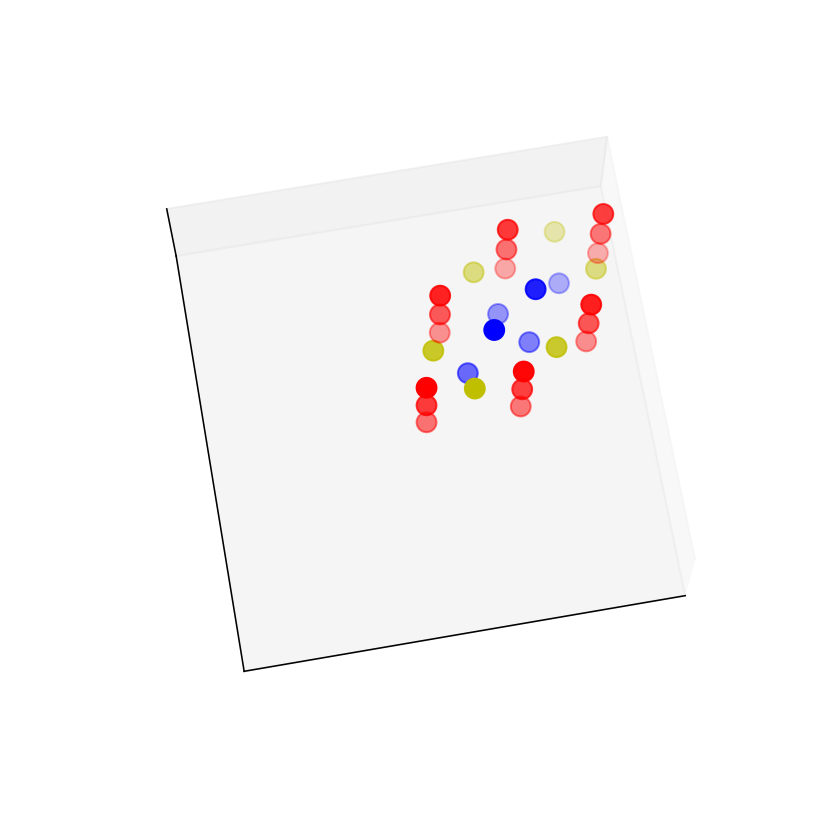

In [12]:
c_red, c_blu, c_ylw = unitcell_R([0,0,0], 0)

fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([20,20,6])
ax.view_init(elev=72, azim=-100)
# ax.view_init(elev=58.2825, azim=-90)
# ax.axis('equal')

ax.scatter(cH_red[:,0],cH_red[:,1],cH_red[:,2],
           marker='o',c='r',s=100)
ax.scatter(cH_blu[:,0],cH_blu[:,1],cH_blu[:,2],
           marker='o',c='b',s=100)
ax.scatter(cH_ylw[:,0],cH_ylw[:,1],cH_ylw[:,2],
           marker='o',c='y',s=100)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(0,6)
plt.show()

<IPython.core.display.Javascript object>


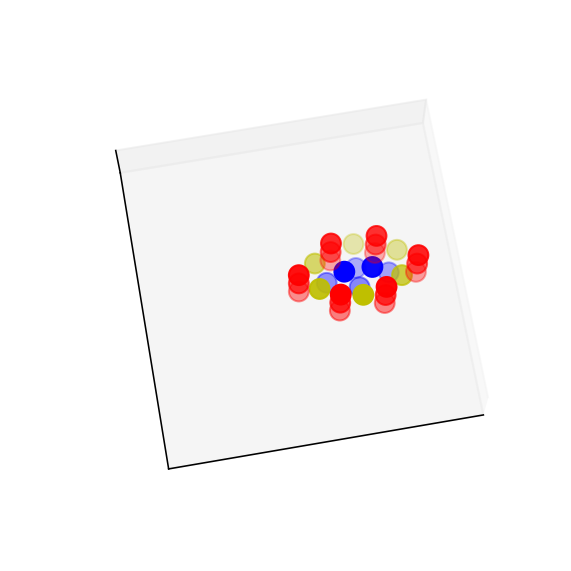

In [13]:
c_red, c_blu, c_ylw = unitcell_H([0,0,0], 0)

fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([30,30,6])
ax.view_init(elev=72, azim=-100)
# ax.view_init(elev=58.2825, azim=-90)
# ax.axis('equal')

ax.scatter(c_red[:,0],c_red[:,1],c_red[:,2],
           marker='o',c='r',s=100)
ax.scatter(c_blu[:,0],c_blu[:,1],c_blu[:,2],
           marker='o',c='b',s=100)
ax.scatter(c_ylw[:,0],c_ylw[:,1],c_ylw[:,2],
           marker='o',c='y',s=100)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)
ax.set_zlim(0,6)

plt.show()

## Generate pentagonal precipitates

In [14]:
orientation_even = (np.arange(5))/5*2*np.pi
orientation_odd  = (0.5+np.arange(5))/5*2*np.pi

In [15]:
def uniq_coords(coordinates,scale=100):
    id_coords = (np.round(coordinates*scale))
    id_coords_unique = (np.unique(id_coords,axis=0,return_index=True)[1])
    id_coords_unique.sort()
    coordinates_unique = coordinates[id_coords_unique,:]
    return coordinates_unique

def merge_coords(function,iterables):
    # Generate coordinates with the generating function according to the iterables 
    c_m_red, c_m_blu, c_m_ylw = [np.vstack([function(i)[clr] for i in iterables]) for clr in range(3)]
    c_m_red = uniq_coords(c_m_red)
    c_m_ylw = uniq_coords(c_m_ylw)
    return c_m_red, c_m_blu, c_m_ylw

def stack_coords(coords):
    c_s_red, c_s_blu, c_s_ylw = [np.vstack([c[clr] for c in coords]) for clr in range(3)]
    c_s_red = uniq_coords(c_s_red)
    c_s_ylw = uniq_coords(c_s_ylw)
    return c_s_red, c_s_blu, c_s_ylw

def shift_coords(coords,shift=np.array([0,0,0])):
    c_s_red, c_s_blu, c_s_ylw = [coords[clr]+shift for clr in range(3)]
    return c_s_red, c_s_blu, c_s_ylw

In [16]:
# Secondary structure
def c_even_stars(origin):
    f = lambda x: unitcell_R(origin, x)
    c_stars_red, c_stars_blu, c_stars_ylw = merge_coords(f,orientation_odd)
    return c_stars_red, c_stars_blu, c_stars_ylw

def c_odd_stars(origin):
    f = lambda x: unitcell_R(origin, x)
    c_stars_red, c_stars_blu, c_stars_ylw = merge_coords(f,orientation_even)
    return c_stars_red, c_stars_blu, c_stars_ylw

# Tertiary structure
lambda_radial = (2+phi)*l_a
n_iter_stars = 5

# (2n)pi/10 stars
r0_even = (phi+1)*l_a
seq_even = np.arange(n_iter_stars)*lambda_radial + r0_even
coords_even = np.array([[x,0,0] for x in seq_even])

R_even = [np.array([[np.cos(o),-np.sin(o),0],
                   [np.sin(o), np.cos(o),0],
                   [0,0,1]]) for o in orientation_even]

origin_star_even = np.vstack([(R@coords_even.T).T for R in R_even])
f_even = lambda x: c_even_stars(x)
c_stars_red_even, c_stars_blu_even, c_stars_ylw_even = merge_coords(f_even,origin_star_even)
c_stars_red_even = uniq_coords(c_stars_red_even)
c_stars_ylw_even = uniq_coords(c_stars_ylw_even)

# (2n+1)pi/10 stars
r0_odd = 2*(phi+1)*l_a
seq_odd = np.arange(n_iter_stars-1)*lambda_radial + r0_odd
coords_odd = np.array([[x,0,0] for x in seq_odd])

R_odd = [np.array([[np.cos(o),-np.sin(o),0],
                   [np.sin(o), np.cos(o),0],
                   [0,0,1]]) for o in orientation_odd]

origin_star_odd = np.vstack([(R@coords_odd.T).T for R in R_odd])
f_odd = lambda x: c_odd_stars(x)
c_stars_red_odd, c_stars_blu_odd, c_stars_ylw_odd = merge_coords(f_odd,origin_star_odd)
c_stars_red_odd = uniq_coords(c_stars_red_odd)
c_stars_ylw_odd = uniq_coords(c_stars_ylw_odd)

c_stars = stack_coords([[c_stars_red_odd, c_stars_blu_odd, c_stars_ylw_odd],
                        [c_stars_red_even, c_stars_blu_even, c_stars_ylw_even]])

# equilateral hexagon
seq_H1 = np.arange(n_iter_stars)*lambda_radial
seq_H2 = (np.arange(n_iter_stars-1)*lambda_radial)
seq_H3 = (np.arange(n_iter_stars-2)*lambda_radial)
axis_HG = np.array([np.cos(-3*np.pi/10),np.sin(-3*np.pi/10),0])
mirror_HG = np.eye(3) - 2*np.outer(axis_HG,axis_HG)

coords_HG1 = np.array([[x,0,0] for x in seq_H1])
coords_HG2 = (mirror_HG@coords_HG1.T).T
coords_HG3 = (R_odd[0]@np.array([[x,0,0] for x in seq_H3]).T).T + np.array([1,0,0])*lambda_radial
coords_HG4 = (mirror_HG@coords_HG1.T).T
# coords_HG5 = ((R_odd[0]@np.array([[x,0,0] for x in seq_H3]).T).T + 
#               (np.array([np.cos(np.pi/5),np.sin(np.pi/5),0])+
#                np.array([np.cos(2*np.pi/5),np.sin(2*np.pi/5),0])
#               )*(1+phi)*l_a
#              )

axis_HR = np.array([np.cos(np.pi/2),np.sin(np.pi/2),0])
mirror_HR = np.eye(3) - 2*np.outer(axis_HR,axis_HR)
coords_HR1 = np.array([[x,0,0] for x in seq_H2]) + np.array([np.cos(np.pi/5),np.sin(np.pi/5),0])*(1+phi)*l_a
coords_HR2 = (mirror_HR@coords_HR1.T).T
coords_HR3 = (R_odd[0]@np.array([[x,0,0] for x in seq_H2]).T).T + np.array([np.cos(np.pi/5),np.sin(np.pi/5),0])*(1+phi)*l_a
coords_HR4 = (mirror_HR@coords_HR3.T).T
# coords_HR5 = (np.array([[x,0,0] for x in seq_H3]) + 
#               (np.array([1,0,0])*(3+phi)*l_a+
#                np.array([np.cos(np.pi/5),np.sin(np.pi/5),0])*(2+phi)*l_a
#               )
#              )

r_HGC_1 = (np.array([1,0,0])+np.array([np.cos(np.pi/5),np.sin(np.pi/5),0]))*l_a
r_HGC_2 = (np.array([-1,0,0])+np.array([np.cos(2*np.pi/5),np.sin(2*np.pi/5),0]))*l_a
coords_HGC = []
for i in range(n_iter_stars+2):
    for j in range(n_iter_stars+2-2*i):
        coords_HGC.append((n_iter_stars+2-j-1)*r_HGC_1+i*r_HGC_2)
coords_HGC1 = np.array(coords_HGC) + r_HGC_1*(1+phi)
coords_HGC2 = (mirror_HG@coords_HGC1.T).T

r_HRC_1 = r_HGC_1
r_HRC_2 = np.array([1,0,0])*l_a*(2+phi)
coords_HRC = []
for i in range(n_iter_stars+1):
    for j in range(n_iter_stars+1-2*i):
        coords_HRC.append(j*r_HRC_1+i*r_HRC_2)
coords_HRC1 = np.array(coords_HRC) + ((2+phi)*np.array([1,0,0])+(1+phi)*np.array([np.cos(np.pi/5),np.sin(np.pi/5),0]))*l_a
coords_HRC2 = (mirror_HR@coords_HRC1.T).T

coords_H_G = uniq_coords(np.vstack([coords_HG1,coords_HG2,coords_HG3,coords_HG4,coords_HGC1,coords_HGC2]))
coords_H_R = uniq_coords(np.vstack([coords_HR1,coords_HR2,coords_HR3,coords_HR4,coords_HRC1,coords_HRC2]))

f_H_G = lambda x: unitcell_H(x,orientation_odd[0])
f_H_R = lambda x: unitcell_H(x,orientation_even[0])

c_H_red, c_H_blu, c_H_ylw = stack_coords([merge_coords(f_H_G,coords_H_G),merge_coords(f_H_R,coords_H_R)])
c_H_red = uniq_coords(c_H_red)
c_H_ylw = uniq_coords(c_H_ylw)
c_H_blu = uniq_coords(c_H_blu)

for R in R_even:
    c_H_red_i = (R@c_H_red.T).T
    c_H_blu_i = (R@c_H_blu.T).T
    c_H_ylw_i = (R@c_H_ylw.T).T
    c_H_red, c_H_blu, c_H_ylw = stack_coords([[c_H_red, c_H_blu, c_H_ylw],
                                              [c_H_red_i, c_H_blu_i, c_H_ylw_i]])
    

c_H_red = uniq_coords(c_H_red)
c_H_ylw = uniq_coords(c_H_ylw)
c_H_blu = uniq_coords(c_H_blu)
c_H = [c_H_red, c_H_blu, c_H_ylw]

c_layer = stack_coords([c_stars, c_H])

In [17]:
n_layers = 20
c_rod = stack_coords([shift_coords(c_layer, np.array([0,0,l_c])*s - 
                                   np.array([np.min(c_layer[0][:,0])-1e-6,np.min(c_layer[0][:,1])-1e-6,0])) for s in range(n_layers)])
# c_rod = stack_coords([shift_coords(c_layer, np.array([0,0,l_c])*s + 
#                                    np.array([100.00,100.00,8.00])) for s in range(n_layers)])
# boundary = np.array([[0.00,200.00],[0.00,200.00],[0.00,120.00]])
filename_c_rod = 'dump.000000000.txt'
Create_dump(c_rod,filename_c_rod)

<IPython.core.display.Javascript object>


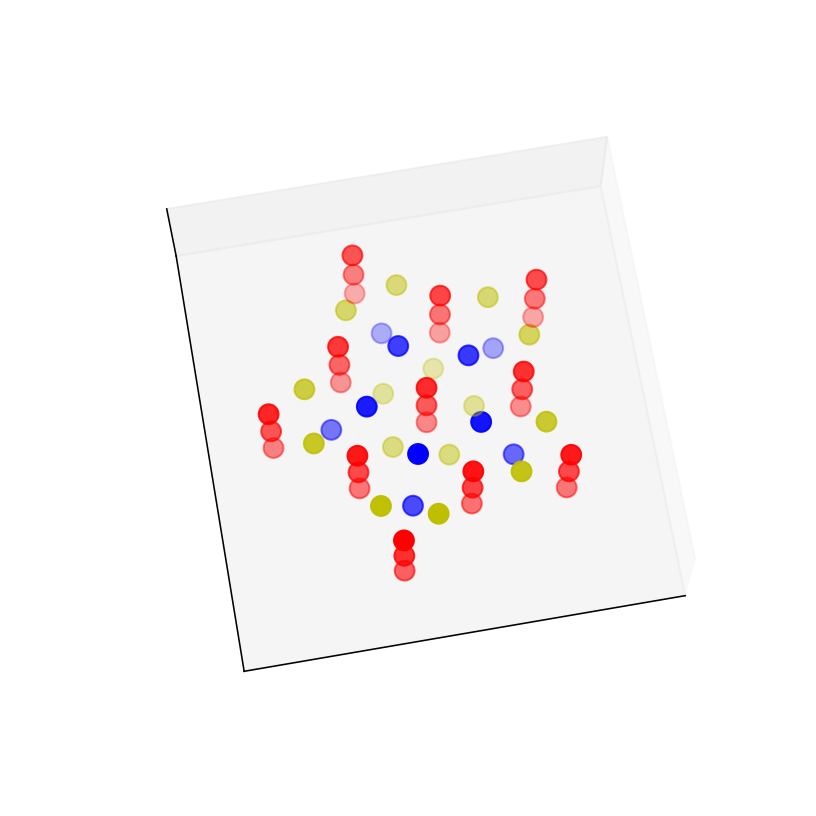

In [18]:
# Demo: Secondary structure

c_red, c_blu, c_ylw = c_even_stars([0,0,0])

fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([20,20,6])
ax.view_init(elev=72, azim=-100)
# ax.view_init(elev=58.2825, azim=-90)
# ax.axis('equal')

ax.scatter(c_red[:,0],c_red[:,1],c_red[:,2],
           marker='o',c='r',s=100)
ax.scatter(c_blu[:,0],c_blu[:,1],c_blu[:,2],
           marker='o',c='b',s=100)
ax.scatter(c_ylw[:,0],c_ylw[:,1],c_ylw[:,2],
           marker='o',c='y',s=100)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(0,6)
plt.show()

<IPython.core.display.Javascript object>


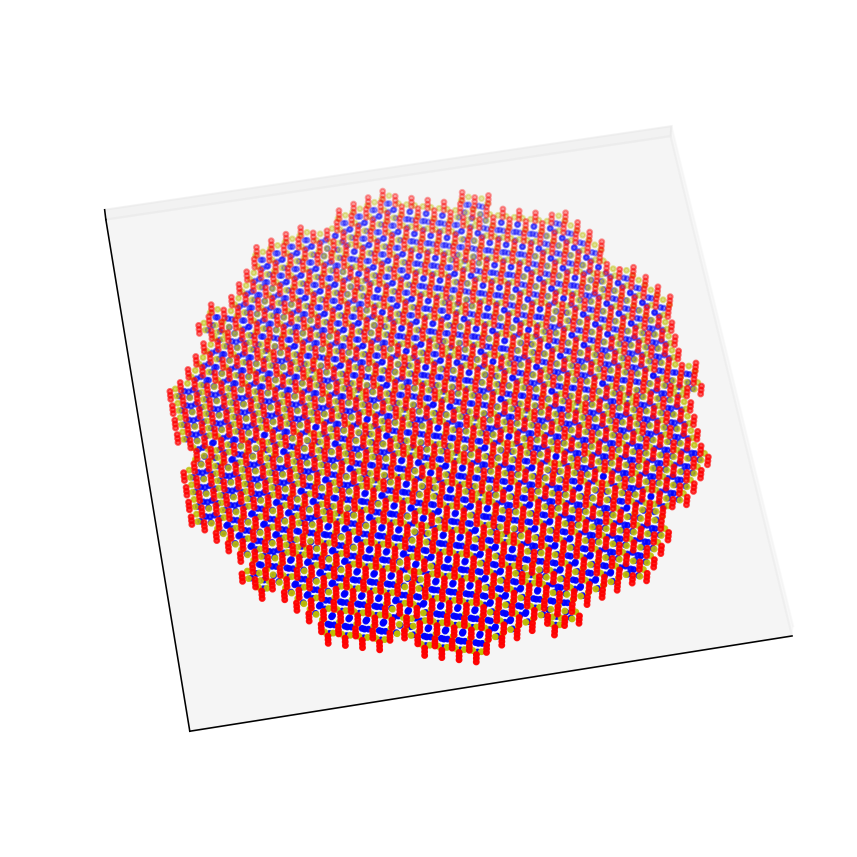

In [19]:
# Demo: Tertiary structure 

c_red, c_blu, c_ylw = c_layer
c_red = uniq_coords(c_red)
c_ylw = uniq_coords(c_ylw)

fig = plt.figure(figsize=(6,6))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([190,190,6])
ax.view_init(elev=60, azim=-100)
# ax.view_init(elev=58.2825, azim=-90)
# ax.axis('equal')

ax.scatter(c_red[:,0],c_red[:,1],c_red[:,2],
           marker='o',c='r',s=6)
ax.scatter(c_blu[:,0],c_blu[:,1],c_blu[:,2],
           marker='o',c='b',s=6)
ax.scatter(c_ylw[:,0],c_ylw[:,1],c_ylw[:,2],
           marker='o',c='y',s=6)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-90,90)
ax.set_ylim(-90,90)
ax.set_zlim(0,6)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


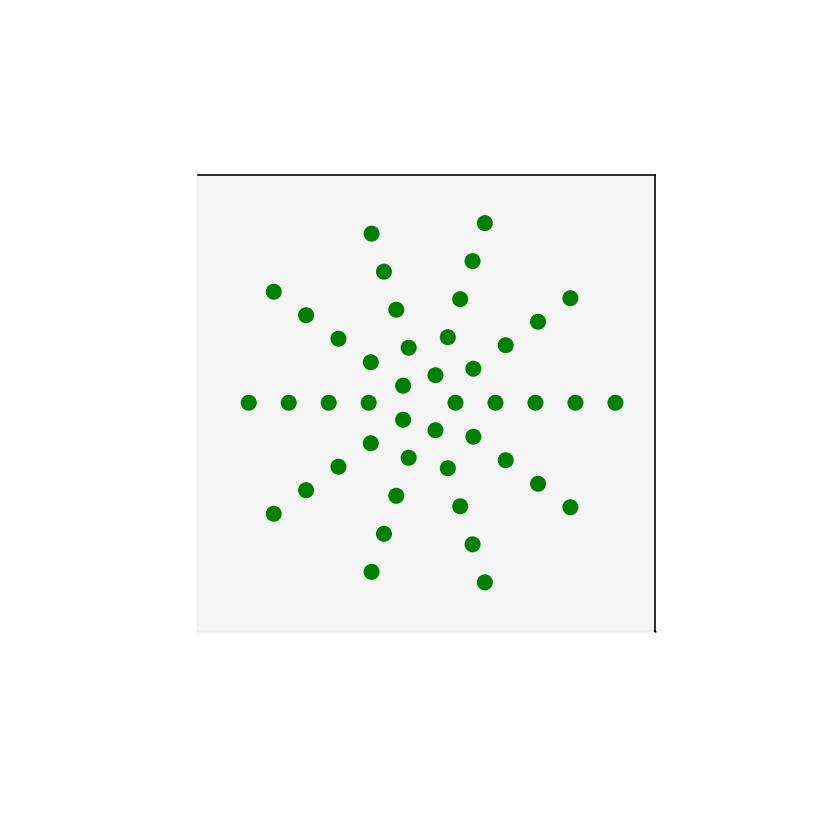

In [20]:
c_even = origin_star_even
c_odd = origin_star_odd

fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([180,180,6])
ax.view_init(elev=90, azim=-90)
# ax.view_init(elev=58.2825, azim=-90)
# ax.axis('equal')

ax.scatter(c_even[:,0],c_even[:,1],c_even[:,2],
           marker='o',c='g',s=50)
ax.scatter(c_odd[:,0],c_odd[:,1],c_odd[:,2],
           marker='o',c='g',s=50)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-90,90)
ax.set_ylim(-90,90)
ax.set_zlim(0,6)
plt.show()